## Audience Segmentation

In this project, you will learn how to apply machine learning techniques for audience segmentation, a critical skill for targeting the right customers in the financial services industry. Using customer behavior data—such as demographics, ad engagement, online purchase behavior, and more—you will perform unsupervised learning to identify distinct customer segments. 

You will work with clustering algorithm - K-Means, experimenting with hyperparameter tuning to optimize model performance. 

Through this process, you will learn how to interpret clusters, define high-value customer criteria, and use the results to create actionable marketing strategies. 

By the end of the project, you'll gain hands-on experience in data preprocessing, feature engineering, model fitting, and evaluating the impact of segmentation for customer acquisition.

In [133]:
# These are package to be loaded
# Do not alter

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

## 1. Data Cleaning

### Task 1-1: Load the df into your environment.

- **Description**: Load the df and inspect its basic structure. 
- **Code Instruction**: 
    1. Load the data from `audience_targeting_dataset.csv` into `df`
    2. Display the first few rows of the df to understand its structure
    3. Check for data types of each column
    4. Get a summary of the df (like count, mean, std for numeric columns)

In [134]:
# Load the df
df = pd.read_csv("audience_targeting_dataset.csv")

# Display the first few rows of the df to understand its structure
print(df.head())

# Check for data types of each column
print(df.dtypes)

# Get a summary of the df (like count, mean, std for numeric columns)
df.describe()


  Age Range      Gender    Location Language    Interest Device Type  \
0     45-54      Female       Texas  Chinese      Travel      Mobile   
1     35-44        Male       Texas    Hindi      Gaming     Desktop   
2     18-24      Female       Texas   French     Fitness      Mobile   
3     45-54      Female     Florida  Spanish        Food      Mobile   
4       55+  Non-binary  California  Spanish  Technology      Mobile   

  Online Purchase Behavior  Ad Engagement (Clicks/Views)  \
0                     Rare                            11   
1                 Frequent                            72   
2                 Frequent                            16   
3                 Frequent                            58   
4                 Frequent                            66   

   Time Spent on Platform (mins)  Page Likes  Ad Impressions  \
0                           25.9           9              11   
1                            6.8           6              41   
2             

,Ad Engagement (Clicks/Views),Time Spent on Platform (mins),Page Likes,Ad Impressions,Lookalike Score
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,49.318500,29.529390,10.0016,24.821100,0.498360
std,28.825786,29.092895,3.1503,14.037279,0.285862
min,0.000000,0.000000,0.0000,1.000000,0.000000
25%,25.000000,8.875000,8.0000,13.000000,0.250000
50%,49.000000,20.700000,10.0000,25.000000,0.500000
75%,74.000000,40.500000,12.0000,37.000000,0.740000
max,99.000000,301.700000,26.0000,49.000000,1.000000


## Task 1-2 :Explore the distribution of each feature.

- **Description**: For numerical features, check how they are distributed (e.g., normal, skewed). For categorical features, see how frequently each category occurs. Visualizations like histograms and bar plots should help you here.
- **Code Instruction**: 
    1. Fill `numeric_features` with column names for all numeric field and `categorical_features` with column names for all categorical fields
    2. Create histogram for numeric features and bar plots for categroical

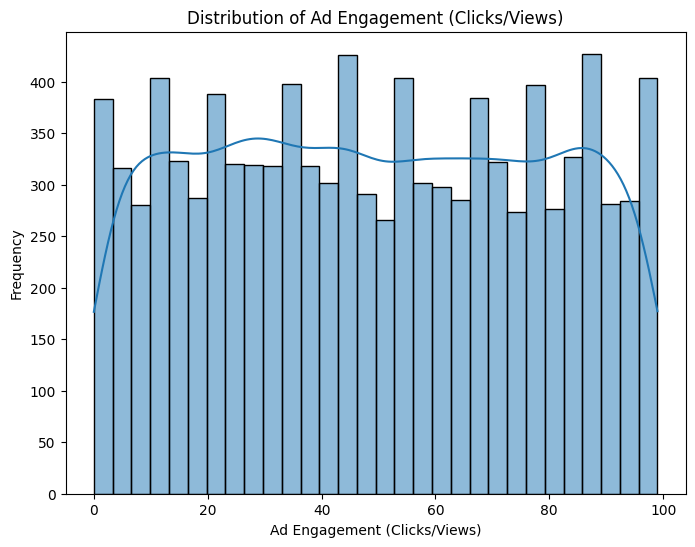

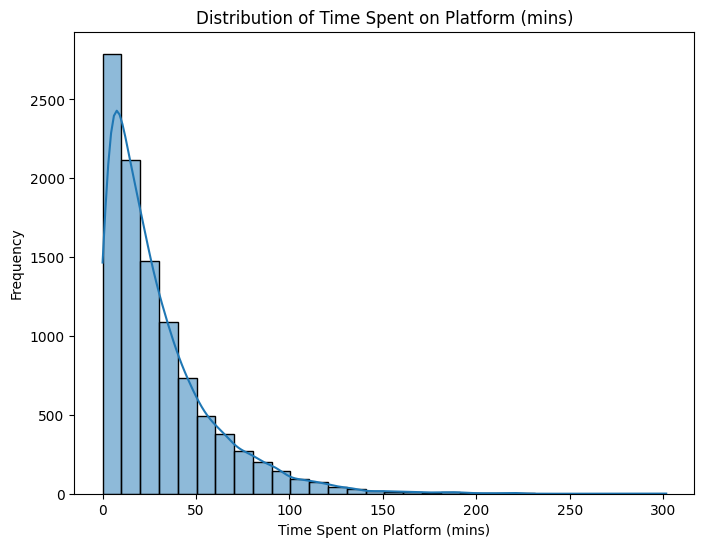

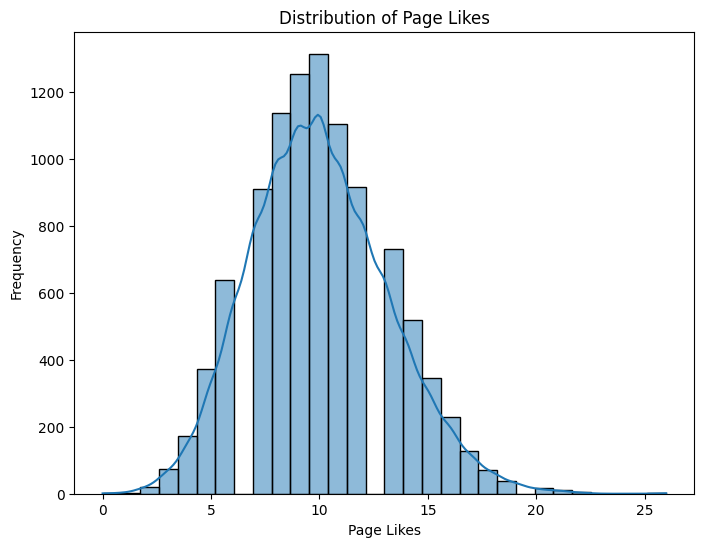

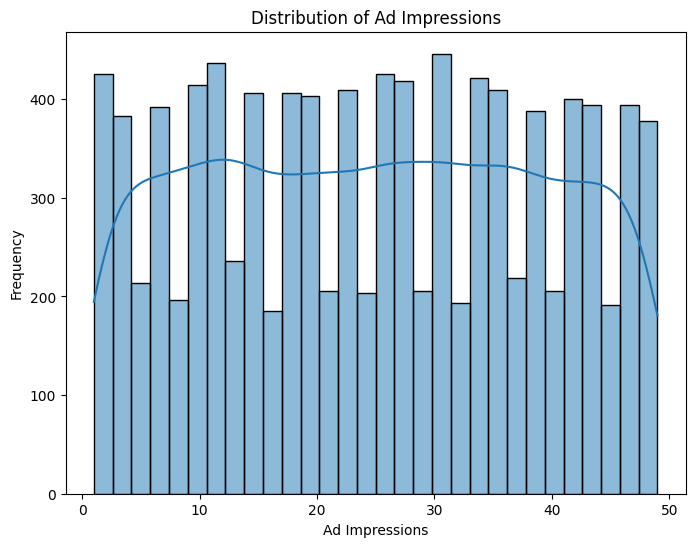

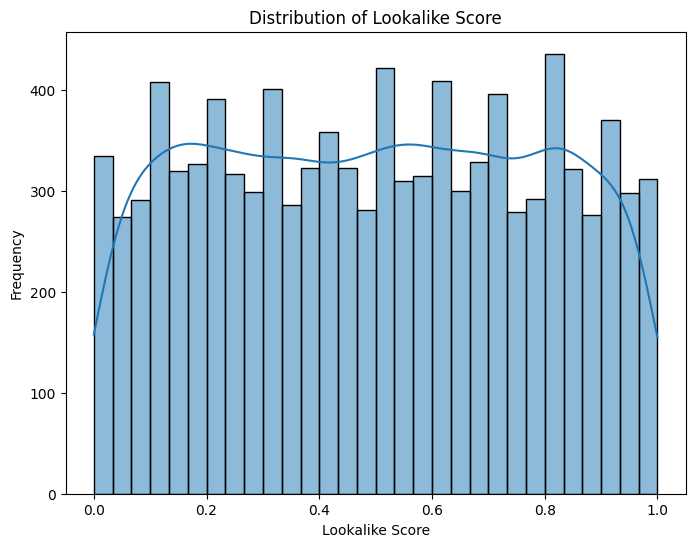

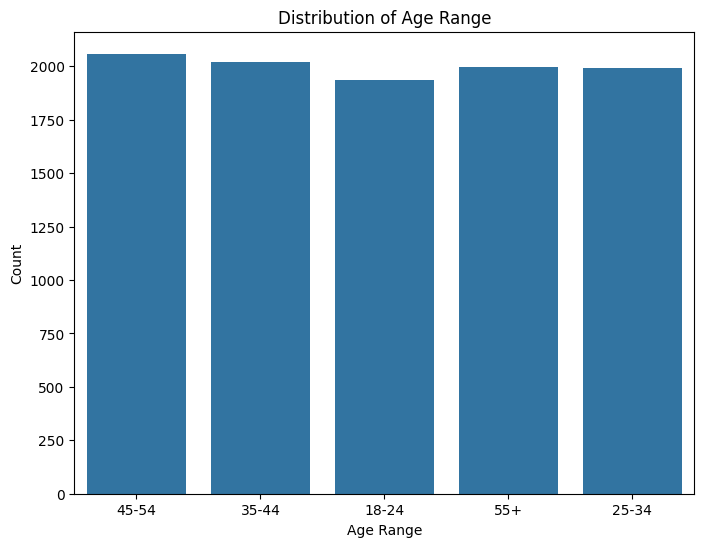

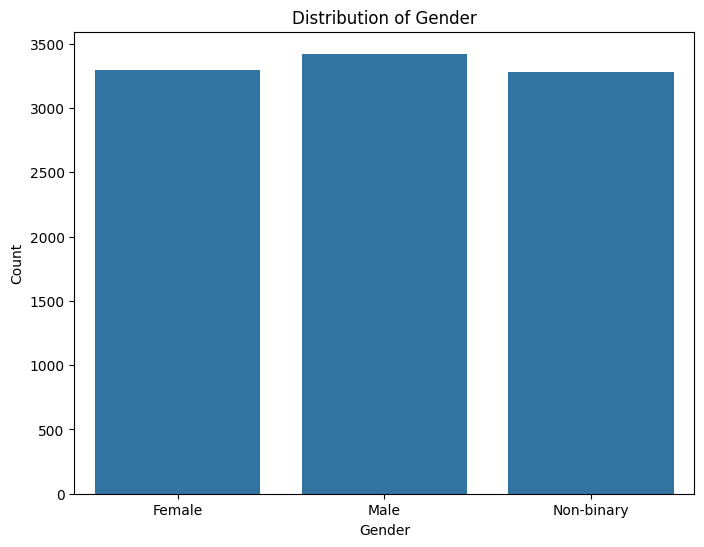

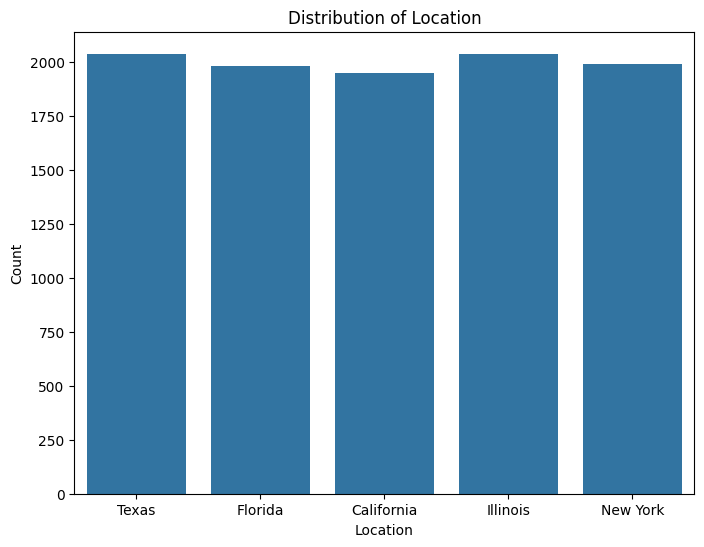

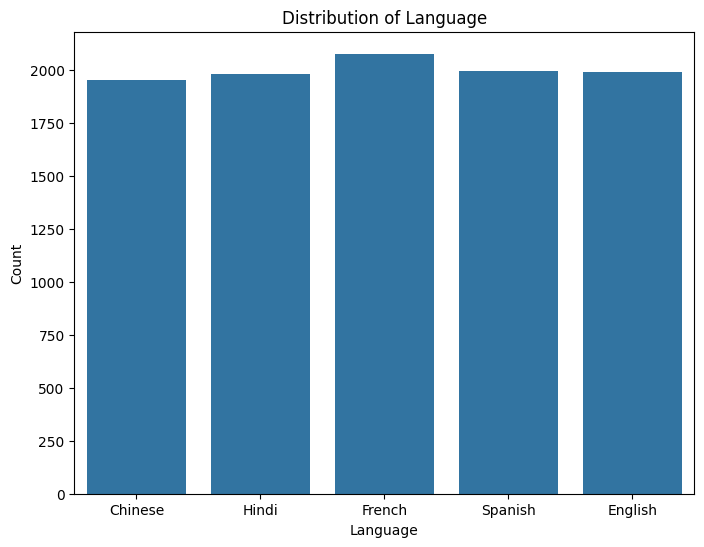

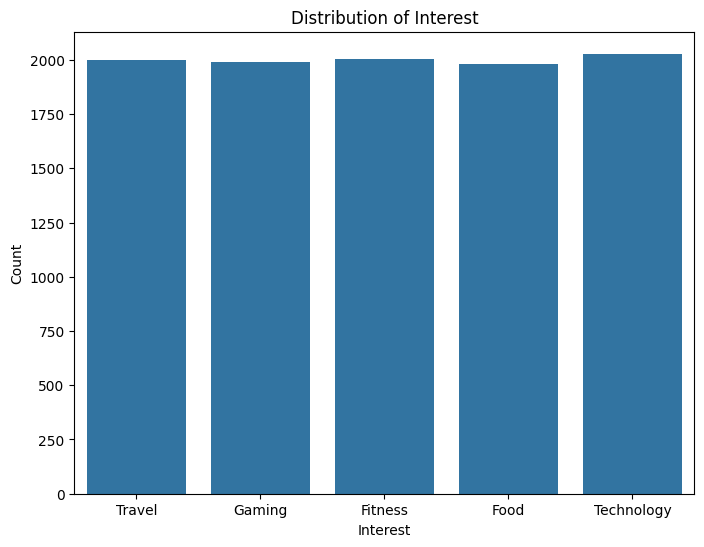

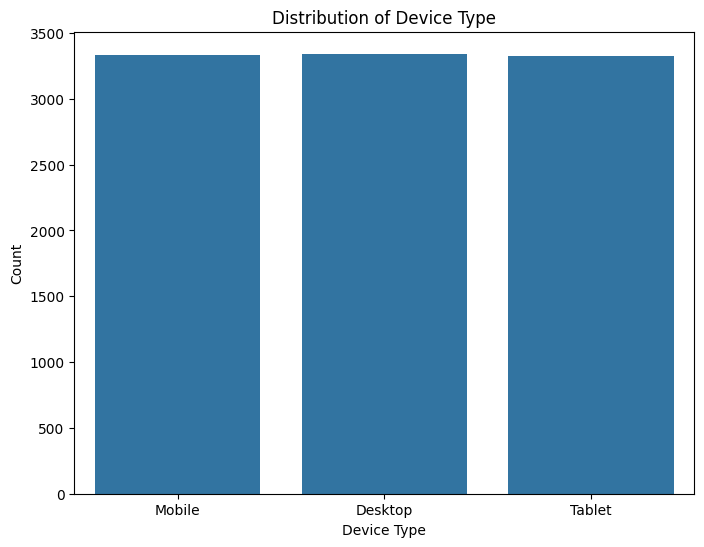

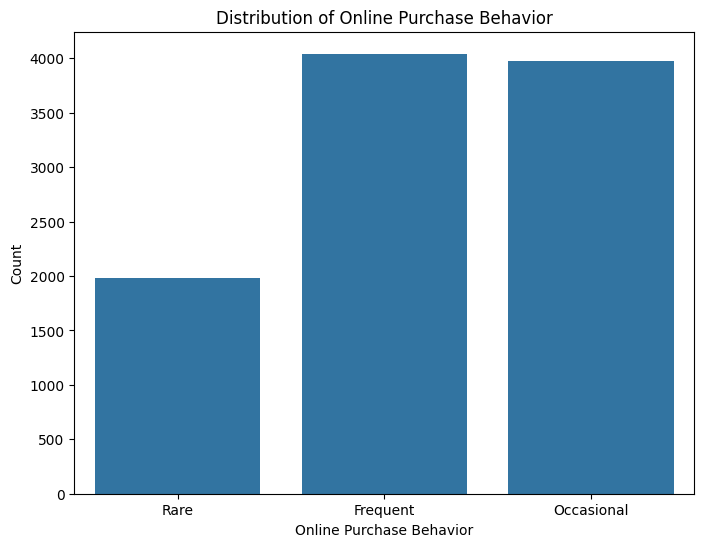

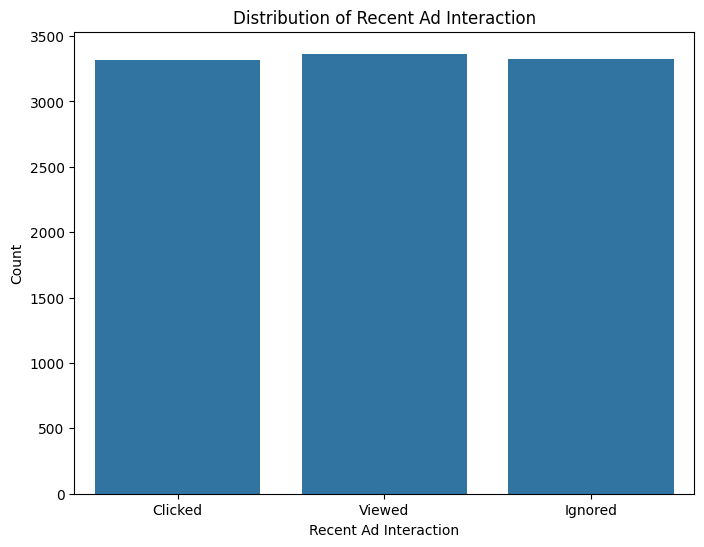

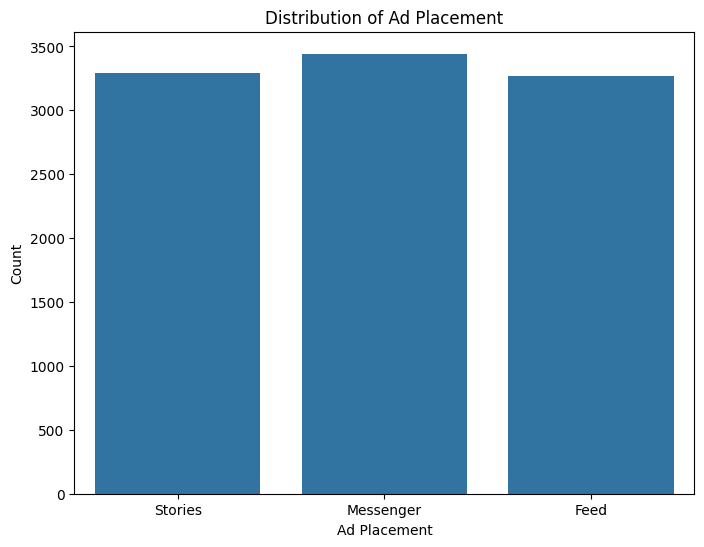

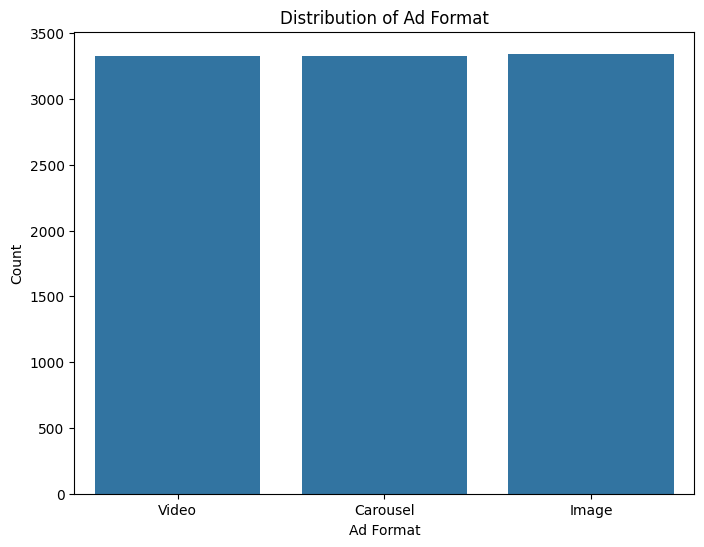

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical features based on your df
numeric_features = ['Ad Engagement (Clicks/Views)', 'Time Spent on Platform (mins)', 
                    'Page Likes', 'Ad Impressions', 'Lookalike Score']  # Example numerical columns

categorical_features = ['Age Range', 'Gender', 'Location', 'Language', 'Interest', 
                        'Device Type', 'Online Purchase Behavior', 'Recent Ad Interaction', 
                        'Ad Placement', 'Ad Format']  # Example categorical columns



# Visualize the distribution of numerical features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## Task 1-3: Remove any duplicate rows

- **Description**: In this task,remove any duplicate rows in the data
- **Code Instruction**: 
    1. Calcualte the number of duplicated rows and store in `duplicates`
    2. Remove duplicate rows and update 'df'

In [136]:
# Check for duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

## Task 1-4: Fill Missing Values

- **Description** : Fill any missing values in the data with column means for numerical cols and column mode for categorical columsn
- **Code Instruction**: 
    1. Use `train_col_miss` to store mean/mode values for each numerical/categorical cols
    2. Fill missing values with mean/mode in `train_col_miss`
    3. Return a dataframe with missing values filled in

`Ask ChatGPT! : How does missing values impact performance of a Logistic Regression model`

In [137]:
# Check for missing values
train_col_miss = {}
def fill_missing_value(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to fill missing (if there are)
    with the mean value of the column for numerical features, 
    and model for categorical features

    `train_col_mean` is a dictionary where keys are features
    and values are mean of field

    Hint: Use feats to iterate through columns
    '''

    # TODO: Solution below, please remove

    for col in numeric_features:
        if train:
            train_col_miss[col] = df[col].mean()
        
        df[col] = df[col].fillna(train_col_miss[col])

    for col in categorical_features:
        if train:
            train_col_miss[col] = df[col].mode()

        df[col] = df[col].fillna(train_col_miss[col])

    return df

fill_missing_value(df, train=True)

,Age Range,Gender,Location,Language,Interest,Device Type,Online Purchase Behavior,Ad Engagement (Clicks/Views),Time Spent on Platform (mins),Page Likes,Ad Impressions,Recent Ad Interaction,Ad Placement,Ad Format,Lookalike Score
0,45-54,Female,Texas,Chinese,Travel,Mobile,Rare,11,25.9,9,11,Clicked,Stories,Video,0.69
1,35-44,Male,Texas,Hindi,Gaming,Desktop,Frequent,72,6.8,6,41,Viewed,Stories,Carousel,0.31
2,18-24,Female,Texas,French,Fitness,Mobile,Frequent,16,93.2,9,27,Clicked,Messenger,Video,0.58
3,45-54,Female,Florida,Spanish,Food,Mobile,Frequent,58,87.2,10,17,Viewed,Messenger,Video,0.51
4,55+,Non-binary,California,Spanish,Technology,Mobile,Frequent,66,6.3,7,3,Clicked,Stories,Carousel,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25-34,Male,California,Chinese,Technology,Mobile,Rare,51,1.7,16,22,Ignored,Messenger,Video,0.44
9996,45-54,Female,New York,French,Food,Tablet,Frequent,87,20.7,8,23,Viewed,Stories,Video,0.94
9997,45-54,Female,Florida,Spanish,Gaming,Mobile,Rare,40,64.3,7,25,Ignored,Feed,Video,0.81
9998,35-44,Non-binary,Florida,Spanish,Technology,Mobile,Occasional,88,2.8,13,44,Ignored,Messenger,Video,0.86


## Task 1-5: Identify outliers

- **Description**: Compelete the below function to clip outlier using `Tukey Outlier method`. Replace the outlier with mean values calculated before.
- **Code Instruction**:
    1. Identify the numerical columns
    2. Identify upper and lower bound using `Tukey Outlier method`
    3. Replace outlier values using mean/model from `train_col_miss` dict defined earlier

`Ask ChatGPT! : How does outlier impact performance of a Logistic Regression Model`


In [138]:
train_col_bounds = {}
def clip_outliers(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to get lower, upper bounds of each col
    Replace low and high with mean values

    `train_col_bounds` is a dictionary where key are features
    and values are tuple (x,y) x being lower bound and y being higher bound

    Hint: Use feats to iterate through columns
    '''

    # TODO: solution below, please remove
    for col in numeric_features:
        if train:
            p25, p75 = df[col].quantile([.25,.75])
            iqr = p75 - p25
            train_col_bounds[col] = (p25 - 1.5 * iqr, p75 + 1.5 * iqr)

        df[col] = df[col].apply(lambda x: train_col_miss[col] if (x < train_col_bounds[col][0] or x >  train_col_bounds[col][1]) else x)

# Do not change this code
clip_outliers(df.copy(), train=True)

## 2.  Selecting Metric

### Task 2-1: Select an appropriate metric for clustering performance.

- **Description**: Think about which metric best reflects the quality of your segmentation. Metrics like Silhouette Score or Davies-Bouldin Index are common for clustering. Read up on them and decide which one would suits your task of identifying distinct customer segments.

- **Code Instruction**: 
    1. Import from sklearn.metrics the required scoring function
    2. Complete the give function using call to selected function

In [139]:
from sklearn.metrics import silhouette_score

def calc_score(X: np.array, labels: np.array) -> float:
    # Calculate the Silhouette Score
    print(X.shape, labels.shape)
    sil_score = silhouette_score(X, labels)
    return sil_score

## 3. Feature Engineering

Before applying clustering or any machine learning algorithm, it's important to preprocess and encode the features. This involves handling numerical and categorical features differently: scaling numerical features and encoding categorical features.

In [140]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preprocessing for numerical data (scaling)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing for categorical data (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessing to the df
X_preprocessed = preprocessor.fit_transform(df)

# Check the shape of the transformed data
print(f"Shape of preprocessed data: {X_preprocessed.shape}")


Shape of preprocessed data: (10000, 43)


## 4. Create a no-ML baseline

- **Description**: You can create a baseline by manually grouping customers based on simple rules such as their age range or location. 
- **Code Instruction**: 
    1. Complete function classify_age
    2. Evaluate the baseline using the score above

In [141]:
# Create baseline segmentation based on 'Age Range' and 'Location' (example)
# Grouping based on simple rules (e.g., by 'Age Range' and 'Location')

def classify_age(age_cat: str):
    '''
    Complete
    '''
    if age_cat == '18-24':
        return 0
    elif age_cat == '25-34':
        return 1
    elif age_cat == '35-44':
        return 2
    elif age_cat == '45-54':
        return 3
    else:
        return 4


labels = df['Age Range'].apply(classify_age)
calc_score(X_preprocessed, labels)

(10000, 43) (10000,)


0.040855732559133995

## 5. Fit and Tune Model

### Task 5-1: Create a initial K-Means clustering model

- **Description**: You create a model by calling the `fit_predict` function of `KMeans` in sklearn
- **Code Instruction**: 
    1. Use KMeans from sklearn to model and get prediction on the processed dataset `X_preprocessed`
    2. Set cluster number to 10, we can experiment with this in the next section
    2. Evaluate the baseline using the score above

In [142]:
from sklearn.cluster import KMeans

# Fit the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)  # You can adjust n_clusters based on your df
kmeans_labels = kmeans.fit_predict(X_preprocessed)  # X_preprocessed is the preprocessed data
calc_score(X_preprocessed, kmeans_labels)

(10000, 43) (10000,)


0.04372811108606195

### Task 5-2: Tune the hyperparameters of the K-Means clustering model to improve the fit.

- **Description**: Test different hyper-parameter to get a good fit for K-Means
- **Code Instruction**: 
    1. Experiment with atleast three parameters of K-Means => number of clusters, initialization method, number of iteration (Ask ChatGPT, what each of these parameters do for k-means)
    2. Fill `params` list with all the values you want to experiment with
    2. Fit model with different paramaters and see which one give the best score

The goal of this task is to optimize the number of clusters (n_clusters) for the K-Means algorithm. Use hyperparameter tuning techniques like GridSearchCV or RandomizedSearchCV to find the optimal number of clusters and any other important hyperparameters, such as initialization methods.

In [143]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV


best_score = -1
best_params = None

# TODO: Solution below
params = [(3,'k-means++', 300), 
          (5,'k-means++', 300),
          (10,'k-means++', 300)]

for param in params:

    n_cluster, init, iter = param
    # Create a KMeans model
    kmeans = KMeans(random_state=42, 
                    n_clusters=n_cluster,
                    init = init,
                    max_iter = iter)

    labels = kmeans.fit_predict(X_preprocessed)
    score = calc_score(X_preprocessed, labels)
    if score > best_score:
        best_score = score
        best_params = param

print(best_score, best_params)


(10000, 43) (10000,)
(10000, 43) (10000,)
(10000, 43) (10000,)
0.054358871366014354 (5, 'k-means++', 300)


## Task 5-3: Interpret mdoel results


- **Description**: See what patterns emerge in each of the clusters
- **Code Instruction**: 
    1. Use the best parameters identified in the earlier task to fit Kmeans
    2. Get the mean/mode for numerical/categorical features in each cluster
    3. Use these values to hypothesise what user groups will be 'high-value' ones

In [144]:
# Calculate the median/mode values of each feature for each cluster
kmeans = KMeans(random_state=42, 
                    n_clusters=5,
                    init = 'k-means++',
                    max_iter = 300)
df['label'] = kmeans.fit_predict(X_preprocessed)
pd.concat([df.groupby('label')[numeric_features].median(), 
           df.groupby('label')[categorical_features].\
            agg(lambda x: x.value_counts().index[0])], axis=1)

# Identify which ones are high-value based on 'Lookalike-score' and try to see what insights you can suggest based on user attributes.

,Ad Engagement (Clicks/Views),Time Spent on Platform (mins),Page Likes,Ad Impressions,Lookalike Score,Age Range,Gender,Location,Language,Interest,Device Type,Online Purchase Behavior,Recent Ad Interaction,Ad Placement,Ad Format
label,,,,,,,,,,,,,,,
0,28.0,17.70,10.0,11.0,0.66,35-44,Non-binary,Illinois,French,Technology,Mobile,Frequent,Clicked,Messenger,Image
1,73.0,17.85,10.0,34.0,0.77,35-44,Male,Texas,Spanish,Travel,Tablet,Occasional,Viewed,Messenger,Video
2,23.0,18.00,10.0,37.0,0.33,45-54,Male,Florida,English,Travel,Tablet,Occasional,Viewed,Feed,Video
3,76.0,17.70,10.0,17.0,0.22,45-54,Male,Illinois,Spanish,Fitness,Desktop,Frequent,Viewed,Messenger,Image
4,48.0,85.35,10.0,25.0,0.51,45-54,Male,Illinois,French,Technology,Mobile,Occasional,Ignored,Messenger,Carousel
